# Реализация метода математической оптимизации - RMSProp

---

**RMSProp** - (**Root Mean Square Propagation**) - метод оптимизации, который позволяет ускорить сходимость градиентного спуска. Он является модификацией алгоритма **Adagrad**, который имеет проблему с затуханием градиента. **RMSProp** решает эту проблему, используя экспоненциальное скользящее (дисконтированное) среднее квадрата градиентов, деля градиент на корень из этого среднего.
> 
> **NOTE:** В центрированном варианте дополнительно рассчитывается скользящее среднее значение градиентов, и это среднее используется для оценки дисперсии.

## Математическая формулировка

---

Допустим, нам дана функция: 
$$y(x) = x^{3}⋅\ln(x)$$

Выпишем вид производной этой функции:
$$y'(x) = (x^{3}⋅\ln(x))' = (x^{3})'⋅\ln(x) + x^{3}⋅(\ln(x))' = 3⋅x^{2}⋅\ln(x) + x^{3}⋅\frac{1}{x} = 3⋅x^{2}⋅\ln(x) + x^{2} = x^{2}⋅(3⋅\ln(x) + 1)$$

Для нахождения минимума воспользуемся градиентным спуском. Вспомним как формульно он выглядит:
$$w^{n+1} = w^{n} - \alpha \frac{∇f(w^n)}{\|∇f(w^n)\|}$$

Так как наш алгоритм будет принимать на вход только одну переменную, то и градиент будет одномерным. В случае многомерного градиента, мы делим на норму градиента, чтобы получить вектор единичной длины. В случае одномерного градиента, норма равна модулю, поэтому делить на норму не нужно. В таком случае формула принимает следующий вид:
$$w^{n+1} = w^{n} - \alpha⋅∇f(w^{n})$$
где:
- $w^{n}$ - текущая точка
- $w^{n+1}$ - следующая точка
- $∇f$ - градиент функции
- $\alpha$ - learning rate _(скорость обучения)_

> **NOTE:** Единичный вектор, или орт, — вектор нормированного пространства, длина которого равна единице. Единичные вектора используются, в частности, для задания направлений в пространстве. Множество единичных векторов образует единичную сферу.

Теперь рассмотрим поиск минимума при помощи алгоритма `RMSProp`. Для этого воспользуемся формулой:
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta⋅(∇f(w^{n})) ^ 2$$
где:
- $w^{n}$ - текущая точка
- $w^{n+1}$ - следующая точка
- $∇f$ - градиент функции
- $\alpha$ - learning rate _(скорость обучения)_
- $\beta$ - мера учета инерции _(каэффициент затухания или дисконтирования)_
- $\gamma^{n+1}$ - скользящее _(дисконтированное)_ среднее квадрата градиентов
- $ɛ$ - малое число, чтобы избежать деления на ноль

## Реализация в коде

---

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Реализуем функцию `y(...)` в ячейке ниже, которая на вход принимает $x_0$, а на выходе возвращает значение функции $y(x)$ в точке $x_0$ (то есть $y(x_0)$):

In [5]:
def y(x0_: np.array) -> np.array:
    return x0_**3 * np.log(x0_)

Реализуем функцию `dy(...)` в ячейке ниже, которая на вход принимает $x_0$, а на выходе возвращает значение производной функции $y(x)$ в точке $x_0$ (то есть $y'(x_0)$):

In [6]:
def dy(x0_: np.array) -> np.array:
    return x0_**2 * (3 * np.log(x0_) + 1)

Проверим, что все работает ожидаемым образом:

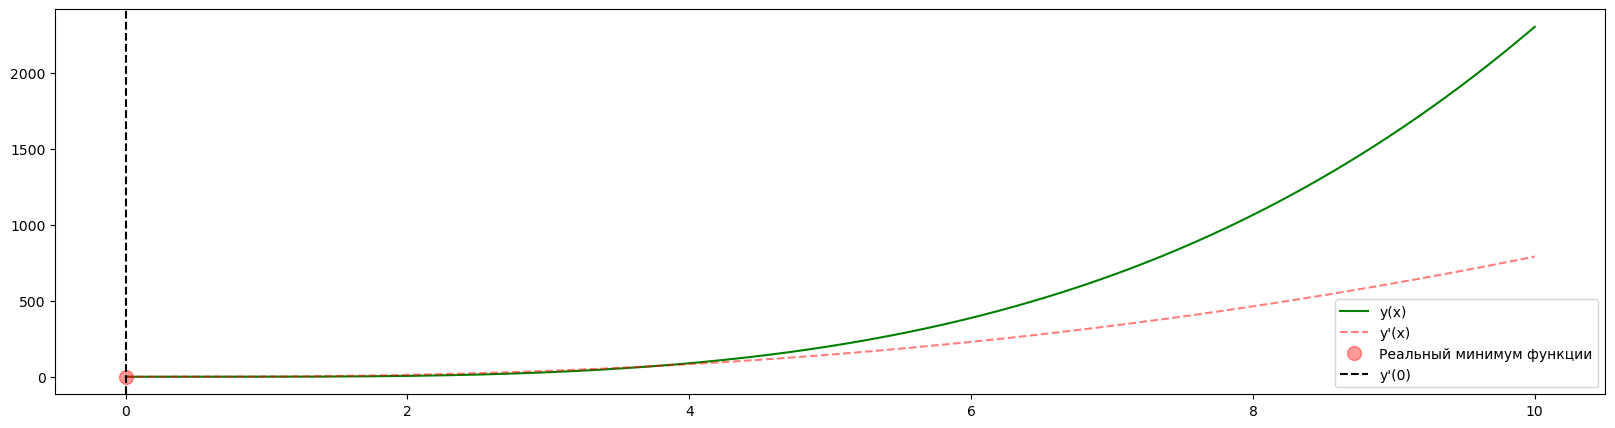

In [72]:
x_ = np.linspace(0.001, 10, 1000)

plt.figure(figsize=(20, 5))

plt.plot(x_, y(x_), "g-", label="y(x)")
plt.plot(x_, dy(x_), "r--", label="y'(x)", alpha=0.5)
plt.plot(0, min(y(x_)), "ro", label="Реальный минимум функции", markersize=10, alpha=0.4)
plt.axline((0, 0), (0, min(y(x_))), color="black", linestyle="--", label="y'(0)")

plt.legend()
plt.show()

Реализуем функцию `get_min_with_gd(...)`, которая принимает на вход следующие гиперпараметры: начальную точку, число шагов, скорость обучения, порог остановки алгоритма. Внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге:

In [23]:
def get_min_with_gd(x0_: int, n_steps_: int = 10_000, alpha_: float = 0.01, threshold_: float = 0.0001) -> np.array:
    w_ = np.array([x0_])
    history_ = [w_]
    for _ in range(n_steps_):
        w_ = w_ - alpha_ * dy(w_)
        history_.append(w_)
        if np.mean(abs(w_ - history_[-2])) < threshold_:
            break
    return np.array(history_)

Проверим ее работу:

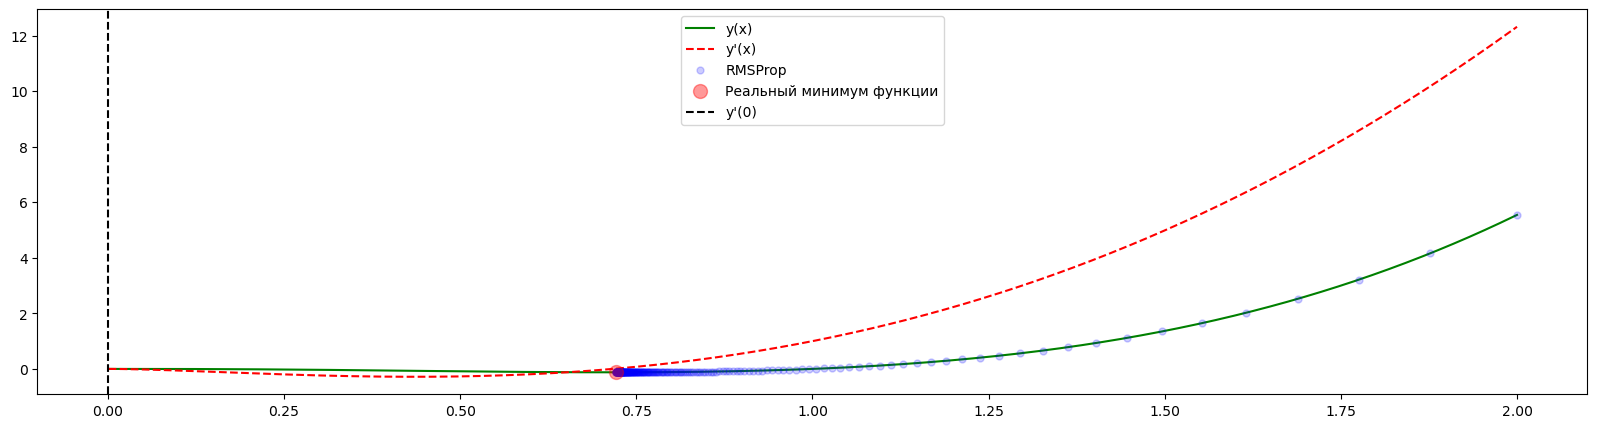

In [105]:
result_gd_ = get_min_with_gd(2)
x_ = np.linspace(0.001, 2, 1000)

plt.figure(figsize=(20, 5))

plt.plot(x_, y(x_), "g-", label="y(x)")
plt.plot(x_, dy(x_), "r--", label="y'(x)")
plt.plot(result_gd_[:, 0], y(result_gd_[:, 0]), "bo", label="RMSProp", markersize=5, alpha=0.2)
plt.plot(result_gd_[:, 0][-1], y(result_gd_[:, 0][-1]), "ro", label="Реальный минимум функции", markersize=10, alpha=0.4)
plt.axline((0, 0), (0, min(y(x_))), color="black", linestyle="--", label="y'(0)")

plt.legend()
plt.show()

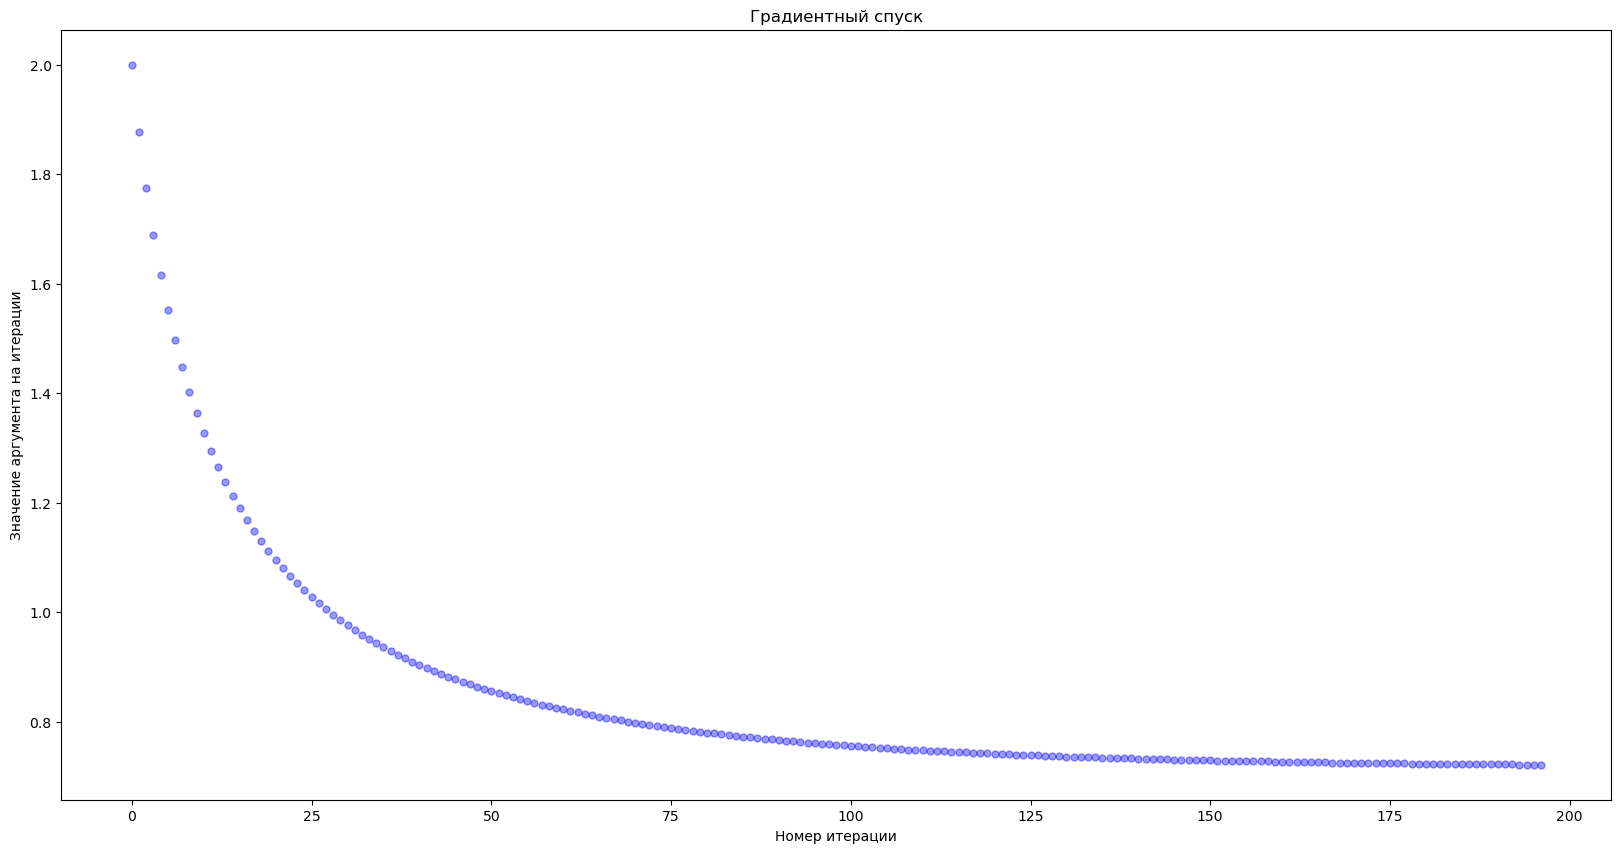

In [106]:
plt.figure(figsize=(20, 10))

plt.plot(result_gd_, "bo", label="GD", markersize=5, alpha=0.4)

plt.title("Градиентный спуск")
plt.xlabel("Номер итерации")
plt.ylabel("Значение аргумента на итерации")

plt.show()

Как мы можем увидеть, градиентный спуск сходится к минимуму функции $y(x)$, но делает это довольно резко. Это происходит из-за того, что мы используем фиксированную скорость обучения $\alpha$. Попробуем улучшить сходимость, используя алгоритм `RMSProp`.

Реализуем функцию `get_min_with_rmsprop(...)`, которая принимает на вход начальную точку, число шагов, скорость обучения, порог остановки алгоритма и коэффициент затухания. Внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге:

In [107]:
def get_min_with_rmsprop(x0_: int, n_steps_: int = 10_000, alpha_: float = 0.01, threshold_: float = 0.0001, beta_: float = 0.01) -> np.array:
    gamma_, epsilon_ = 0, 0.0001
    w_ = np.array([x0_ if x0_ != 0 else epsilon_])
    history_ = [w_]
    for _ in range(n_steps_):
        grad_ = dy(w_)
        gamma_ = (1 - beta_) * gamma_ + beta_ * grad_**2
        w_ = w_ - alpha_ / np.sqrt(gamma_ + epsilon_) * grad_
        history_.append(w_)
        if np.mean(abs(w_ - history_[-2])) < threshold_:
            break
    return np.array(history_)

Проверим ее работу:

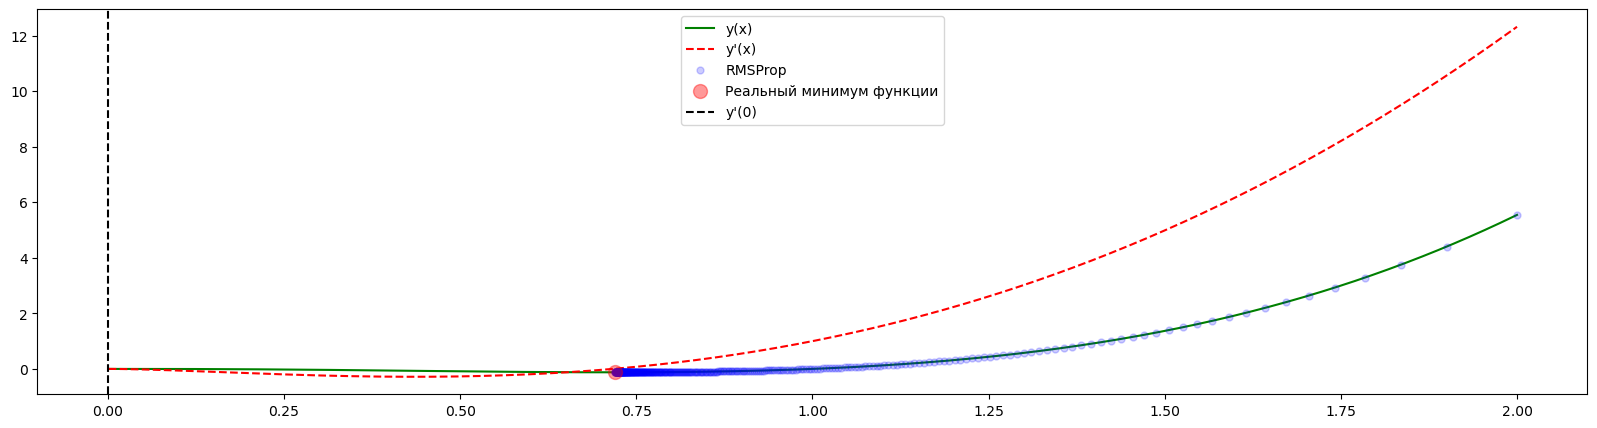

In [108]:
result_rmsprop_ = get_min_with_rmsprop(2)
x_ = np.linspace(0.001, 2, 1000)

plt.figure(figsize=(20, 5))

plt.plot(x_, y(x_), "g-", label='y(x)')
plt.plot(x_, dy(x_), "r--", label='y\'(x)')
plt.plot(result_rmsprop_[:, 0], y(result_rmsprop_[:, 0]), "bo", label="RMSProp", markersize=5, alpha=0.2)
plt.plot(result_rmsprop_[:, 0][-1], y(result_rmsprop_[:, 0][-1]), "ro", label="Реальный минимум функции", markersize=10, alpha=0.4)
plt.axline((0, 0), (0, min(y(x_))), color="black", linestyle="--", label="y'(0)")

plt.legend()
plt.show()

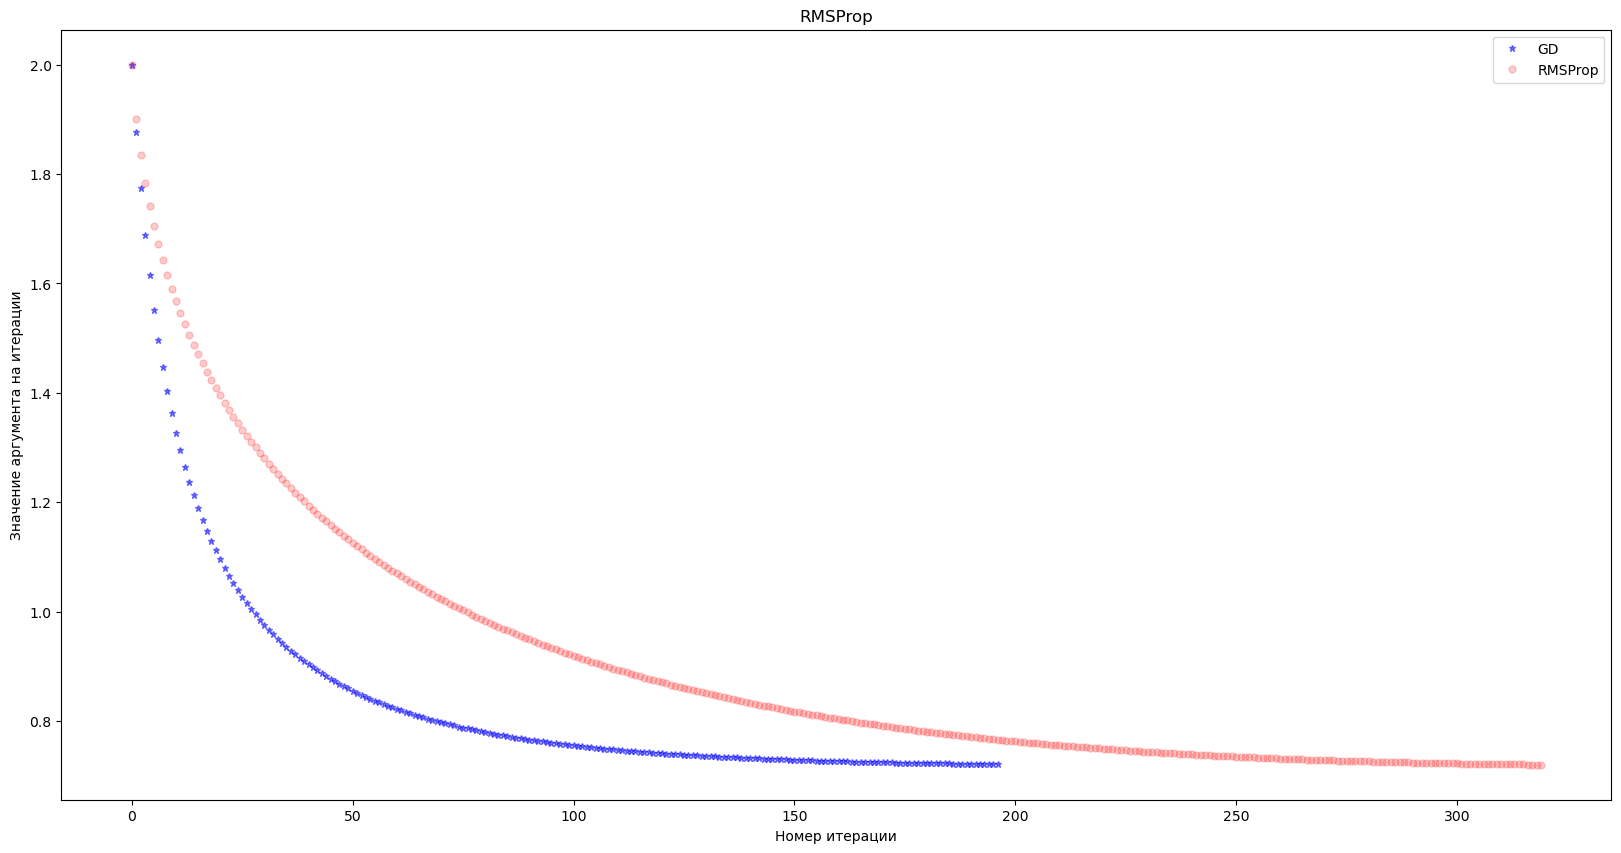

In [118]:
plt.figure(figsize=(20, 10))

plt.plot(result_gd_[:, 0], "b*", label="GD", markersize=5, alpha=0.5)
plt.plot(result_rmsprop_[:, 0], "ro", label="RMSProp", markersize=5, alpha=0.2)

plt.title("RMSProp")
plt.xlabel("Номер итерации")
plt.ylabel("Значение аргумента на итерации")

plt.legend()
plt.show()